In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import sys

In [2]:
from pathlib import Path
sys.path.insert(0,os.path.abspath('../'))
sys.path.insert(0,os.path.abspath('../utilities'))

In [3]:
from utilities.resnet import resnet101

In [4]:
from utilities.utils import *

## Resnet 101 on CIFAR-100

In [5]:
model = resnet101(num_classes=100)

In [6]:
LABEL='R101-CIFAR100'

## Getting the hooks for each layers

In [7]:
hookLayersActivationDict = {}
activationDict = {}

In [8]:
modelNamedModules = dict(model.named_modules())

In [9]:
hookLayers = []
for i in modelNamedModules.keys():
    if i.__contains__("bn") or i.__contains__("relu") or i.__contains__("avgpool") or i.__contains__("fc") or i.__contains__("maxpool") :
        hookLayers.append(i)

In [10]:
for layer in hookLayers:
    h = model.get_submodule(layer).register_forward_hook(getActivation(layer,hookLayersActivationDict))

## CIFAR 100

In [11]:
TRAIN_BATCH_SIZE = 256
TEST_BATCH_SIZE = 256
NUM_WORKERS = 0

normalize = transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                     std=[0.2675, 0.2565, 0.2761])

train_dataset = datasets.CIFAR100(root='./data', train=True, transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,
        batch_size=TRAIN_BATCH_SIZE, shuffle=True,
        num_workers=NUM_WORKERS, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
        datasets.CIFAR100(root='./data', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=TEST_BATCH_SIZE, shuffle=False,
        num_workers=NUM_WORKERS, pin_memory=True)

Files already downloaded and verified


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
model = model.to(device)
valid_acc,activationDict = evaluate(model,device,val_loader,hookLayers,hookLayersActivationDict)

Iteration:   0%|          | 0/40 [00:01<?, ?it/s]


## HSIC calculation and plots

In [14]:
col1,col2,hsicScoreList = getLayerWiseOutputCorrelation(hookLayers,hookLayers,activationDict,activationDict)

Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.2037203708271137e-27
Denom:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.2037203708271137e-27
Denom:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834

Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Layer 1:layer3.19.bn2, HSI

Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer3.12

Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Layer 1:layer4.2.bn3, HSI

Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
De

Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0


Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:0.0
De

Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer

Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Layer 1:layer3.17.relu3, HSIC score:0.0


Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC scor

Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0


Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer

Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC scor

Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:

Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Layer 1:avgpool,

Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1

Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.11.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
De

Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Deno

Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:la

Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0

Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.2127754193501419e-27
Denom:0.0
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.2127754193501419e-27
Denom:0.0
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSI

Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer

Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.1457678869460379e-27
Denom:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.1457678869460379e-27
Denom:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:

Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0

Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
La

Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:

Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.1596523011011143e-27
Denom:0.0
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.1596523011011143e-27
Denom:0.0
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.6.relu2, 

Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
D

Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.2037203708271137e-27
Denom:0.0
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.2037203708271137e-27
Denom:0.0
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.6.relu2, HSIC sco

Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan

Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:9.80361993677765e-28
Denom:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:9.80361993677765e-28
Denom:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.6.rel

Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Layer 1:layer3.20.bn1, HSIC score:nan
Cross H

Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.1047182309253795e-27
Denom:0.0
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.1047182309253795e-27
Denom:0.0
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.6.relu2, 

Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:in

Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.0087345047289861e-27
Denom:0.0
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.0087345047289861e-27
Denom:0.0
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.6.relu2, 

Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:inf


Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:6.160464409391674e-28
Denom:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:6.160464409391674e-28
Denom:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.6.relu2, HS

Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC scor

Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:8.427249287196451e-28
Denom:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:8.427249287196451e-28
Denom:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.6.r

Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC sc

Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:1.1059255964075158e-27
Denom:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:1.1059255964075158e-27
Denom:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.6.relu2, 

Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:in

Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:3.2658610364556562e-28
Denom:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:3.2658610364556562e-28
Denom:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.6.relu2, HSIC sco

Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:

Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
De

Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
De

Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Layer 1:layer3.19.bn1, HSIC score:nan
Cross H

Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1

Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0


Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn2, HSIC score

Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1

Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HS

Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn1, HSIC score

Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2

Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn2, HS

Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:

Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Layer 1:layer3.18.bn1, HSIC score:nan
Cross 

Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Layer 1:layer3.17.relu3, H

Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0

Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu2, HSIC sco

Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
De

Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross H

/home/abc586/courseWork/introtodlsystem/finalProject/visualizing-vision-models/utilities/utils.py:102: RuntimeWarning: invalid value encountered in double_scalars
  finalScore = hsicCross/denom


Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Layer 1:la

Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu1, HSIC 

Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:2.4247346751965493e-13
Denom:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:2.4247346751965493e-13
Denom:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.6.relu2, HSIC sco

Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
De

Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Layer 1:layer3.1

Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan


Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:

Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5

Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.bn1, HSIC score:nan
L

Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Cross HSIC score:nan
De

Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.5.relu1, HSI

Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0


Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:1.2040303492516628e-27
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:1.2040303492516628e-27
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:9.80449334600743e-28
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:9.80449334600743e-28
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:1.104480571170242e-27
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:1.104480571170242e-27
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:1.0089270977234249e-27
Denom:0.0
Layer 

Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Laye

Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:1.178092598836136e-27
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:1.178092598836136e-27
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:1.1962421774460525e-27
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:1.1962421774460525e-27
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:1.055211527629425e-27
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:1.055211527629425e-27
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:1.075271821337168e-27
Denom

Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:1.8362683780942966e-32
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Cross HSIC score:2.4247346751965493e-13
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Cross HSIC score:2.4247346751965493e-13
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Cross HSIC score:2.7503186307891296e-37
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Cross HSIC score:2.7503186307891296e-37
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.5

Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:inf
Denom:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.5.r

Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6

Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn1, HSIC score:nan

Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
De

Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.r

Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Layer

Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:

Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.rel

Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:0.0
Denom:0.0
Layer 1:laye

Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0

Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Layer 1:fc, HSI

Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSI

Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.6.r

Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1

Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn1, HSIC score:nan

Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Lay

Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cr

Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Layer 1:

Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:

Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.r

Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7

Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.bn3, HSIC score:0.0

Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:

Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.7.relu3, HSIC

Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:laye

Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn1, HSIC score:nan

Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan


Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.r

Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8

Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Layer 1

Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:

Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:laye

Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.11.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
L

Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:

Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.rel

Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.8.relu3, HSIC 

Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Layer 1:la

Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:

Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.r

Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:la

Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn2, HSIC score:nan
L

Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom

Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu2, H

Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:

Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:bn1, HSIC score

Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSI

Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC sco

Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn1, HSIC score:na

Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:na

Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan

Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:na

Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn2, HSIC

Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu

Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.re

Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.

Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer1.0.bn2, HSIC scor

Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.

Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:l

Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:na

Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn1, HSIC

Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.2.relu1, HSIC score:5.921390056610107
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.re

Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:n

Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn2, HSIC score:nan


Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:nan


Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:0.0
Denom:0.0
Laye

Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.bn3, HSIC s

Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.

Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer

Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.1

Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn1, HSIC scor

Layer 1:layer3.12.bn1, HSIC score:nan
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan

Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.1

Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:la

Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn2, HSIC s

Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC scor

Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:0.0
Denom:0.0


Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC s

Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.bn3, HSIC score:0.

Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.re

Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:na

Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn1, HSIC s

Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:laye

Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC sc

Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn2, HSIC score:na

Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:na

Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:0.0
Denom:0.0
Laye

Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.bn3, HSIC s

Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.

Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer

Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.1

Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC scor

Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC sc

Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.re

Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer

Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn2, HSIC

Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC scor

Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.

Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC score:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.bn3, HSIC

Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC scor

Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:lay

Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn1, HSIC

Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:na

Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:laye

Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan


Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:na

Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:0.0
Denom:0.0
Layer 1:la

Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.13.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.bn3, HSIC

Layer 1:layer3.15.bn3, HSIC score:0.0
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0

Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.re

Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Lay

Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn1, HSIC score:na

Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.

Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn2, HSIC

Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC scor

Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.

Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.bn3, HSIC

Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC scor

Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:lay

Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.16.re

Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn1, HSIC score:nan


Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:na

Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu1, HSIC score:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC score:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn2, HSIC

Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Cross HSIC score:nan
Denom:nan

Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu2, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.

Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.bn3, HSIC score:0.

Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:0.0
Denom:0.

Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.re

Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:

Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn1, HSIC score:na

Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.re

Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn2, HSIC

Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC sc

Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0


Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.17.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.bn3, HSIC s

Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:0

Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.2.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.18.relu3, 

Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn1, HSIC score:nan


Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:na

Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSI

Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:na

Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn2, HSIC s

Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu2, HSIC scor

Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, 

Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.

Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.bn3, HSIC

Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Cross HSIC score:0.0
De

Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.17.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Layer 1:layer3.17.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn1, HSIC

Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC sc

Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn2, HSIC scor

Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:na

Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.10.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.10.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.10.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.10.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC sc

Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:0.0
Denom:0.0
Laye

Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.bn3, HSIC s

Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:0.0


Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.13.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer3.13.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:lay

Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1,

Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1

Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:na

Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:l

Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.3.bn1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.3.relu1, HSIC score:0.00024646363453939557
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.3.bn2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.3.relu2, HSIC score:0.0019661206752061844
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan

Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn2, HSIC

Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC scor

Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3,

Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3, HSIC score:0.

Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.20.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.20.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.20.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.bn3, HSIC

Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.2.bn2, HSIC score:19.276750564575195
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3,

Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.15.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.15.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Laye

Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.12.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.12.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.13.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.13.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.13.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Layer 1:layer3.13.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn1, HSIC

Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.1.relu1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.1.bn2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.1.relu2, HSIC score:0.002298829611390829
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC scor

Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Layer 1:layer3.20.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.2.relu2, HSIC score:19.276750564575195
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.2.bn3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.2.relu3, HSIC score:4.100838335574508e-09
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.3.bn1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:na

Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC sc

Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.8.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.8.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.

Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.1.bn2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Laye

Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.10.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.10.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.11.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC s

Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0


Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC scor

Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:lay

Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.4.

Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.20.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.20.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.21.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.21.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.21.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn1, HSIC score:nan
L

Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan


Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.rel

Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.3.bn3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer2.3.relu3, HSIC score:2.30134037337848e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.0.bn1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:la

Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn2, HSIC score:nan
L

Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSI

Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Layer 1:layer3.19.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.r

Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.0.relu1, HSIC score:5.701525424228748e-06
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0

Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.17.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.17.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.bn3, HSIC score:nan
L

Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.1.bn3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.1.relu3, HSIC score:0.00031294659129343927
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.2.bn1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.2.relu1, HSIC score:0.0011051044566556811
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.2.bn2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.2.relu2, HSIC score:0.0008652328397147357
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.2.bn3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer2.2.relu3, HSIC score:3.584227670216933e-05
Cross HSIC score:nan


Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Layer 1:layer3.15.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.0.r

Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer2.0.relu1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer2.0.bn2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer2.0.relu2, HSIC score:0.002670531626790762
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer2.0.bn3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer2.0.relu3, HSIC score:0.00131206342484802
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer2.1.bn1, HSIC score:0.0020669589284807444
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.

Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.18.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.18.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn1, HSIC score:nan
L

Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.3.relu1, HSIC score:38704644.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.3.bn2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.3.relu2, HSIC score:1028458217472.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.4.bn1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.4.relu1, HSIC score:inf
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:l

Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.rel

Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn

Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Layer 1

Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.7.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.7.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.7.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.7.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.7.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Layer 1:layer3.8.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu2, HSIC 

Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.1.relu2, HSIC score:0.002290684264153242
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.1.bn3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:laye

Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.8.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.8.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.8.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.9.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.9.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.9.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.9.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.9.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer3.9.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:

Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer4.2.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:avgpool, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Layer 1:fc, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:0.0
Denom:0.0
Lay

Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.5.bn2, HSIC score:2.168310714698767e+24
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.5.relu2, HSIC score:2.168310714698767e+24
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.6.bn1, HSI

Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer3.22.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer4.0.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer4.0.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer4.0.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.1.relu3

Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.5.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.5.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.6.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.6.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.6.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.6.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.6.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.6.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:layer3.7.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn1, HSIC score:nan
Layer 1:la

Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer1.1.relu3, HSIC score:0.000554431404452771
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer1.2.bn1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer1.2.relu1, HSIC score:0.0011568800546228886
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer1.2.bn2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer1.2.relu2, HSIC score:0.0012574847787618637
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer1.2.bn3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer1.2.relu3, HSIC score:9.90390544757247e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer2.0.bn1, HSIC score:0.000429413077654317
Cross HSIC score:nan
Denom:

Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.15.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.15.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.16.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.16.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.16.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.16.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.16.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.16.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu1, HSIC score:nan
Layer 1:layer3.17.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.rel

Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.2.bn1, HSIC score:5.921390056610107
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, H

Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.13.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.13.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.14.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.14.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.14.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.14.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.14.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.14.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
Layer 1:layer3.15.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn2, HSIC score:nan
L

Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer1.1.relu1, HSIC score:0.0021176678128540

Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan

Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.0.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.0.bn3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.0.relu3, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.1.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.1.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.1.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.1.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.1.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSIC score:nan
Layer 1:layer4.1.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu2, HSI

Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.3.bn3, HSIC score:3.4193989514739098e-15
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.3.relu3, HSIC score:3.4193989514739098e-15
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.4.bn2, HSIC score:2.5192983495686167e+33
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.4.relu2, HSIC score:2.5192983495686167e+33
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.4.bn3, HSIC score:7.666828697316283e-25
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.4.relu3, HSIC score:7.666828697316283e-25
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.5.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.5.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Lay

Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.21.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.21.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.21.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.21.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.22.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.22.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.22.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.22.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.bn3, HSIC score:0.0
Layer 1:layer3.22.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.bn3, HSIC s

Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.1.bn3, HSIC score:5.127344593347516e-07
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.1.relu3, HSIC score:5.127344593347516e-07
Cross HSIC score:0.0
Denom:0.0
La

Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.18.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.18.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.18.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.18.relu3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.19.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.19.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.19.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.19.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:layer4.2.relu3, HSIC score:0.0
Layer 1:layer3.19.bn3, HSIC score:0.0
Cross HSIC score:0.0
Denom:0.0
Layer 1:layer4.2.rel

Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.0.bn2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.0.relu2, HSIC score:0.002054693875834346
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.0.bn3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.0.relu3, HSIC score:2.9596132662845775e-05
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.1.bn1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.1.relu1, HSIC score:0.03676176816225052
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.1.bn2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.1.relu2, HSIC score:6.353649616241455
Cross HSIC score:nan
Denom:nan
Layer 1:avgpool, HSIC score:nan
Layer 1:layer3.1.bn3, HSIC s

Layer 1:fc, HSIC score:nan
Layer 1:bn1, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:relu, HSIC score:0.0028622436802834272
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer1.0.bn1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer1.0.relu1, HSIC score:0.002882846863940358
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer1.0.bn2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer1.0.relu2, HSIC score:0.002773976419121027
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer1.0.bn3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer1.0.relu3, HSIC score:0.0016073316801339388
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer1.1.bn1, HSIC score:0.0021176678128540516
Cross HSIC score:nan
Denom:na

Layer 1:fc, HSIC score:nan
Layer 1:layer3.11.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.11.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.11.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.11.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.11.bn3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.11.relu3, HSIC score:0.0
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.12.bn1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.12.relu1, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.12.bn2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Layer 1:layer3.12.relu2, HSIC score:nan
Cross HSIC score:nan
Denom:nan
Layer 1:fc, HSIC score:nan
Lay

In [15]:
import pandas as pd
import seaborn as sns

In [16]:
import matplotlib.ticker as ticker

In [17]:
hsicData = {
    'L1' : col1,
    'L2' : col2,
    'hsic':hsicScoreList
}

hsicDataFrame = pd.DataFrame(data=hsicData)
hsicDataFrame = hsicDataFrame.pivot("L1", "L2", "hsic")

/tmp/ipykernel_1692140/3892509884.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(LABEL+'.pdf',fmt='pdf',bbox_inches='tight')


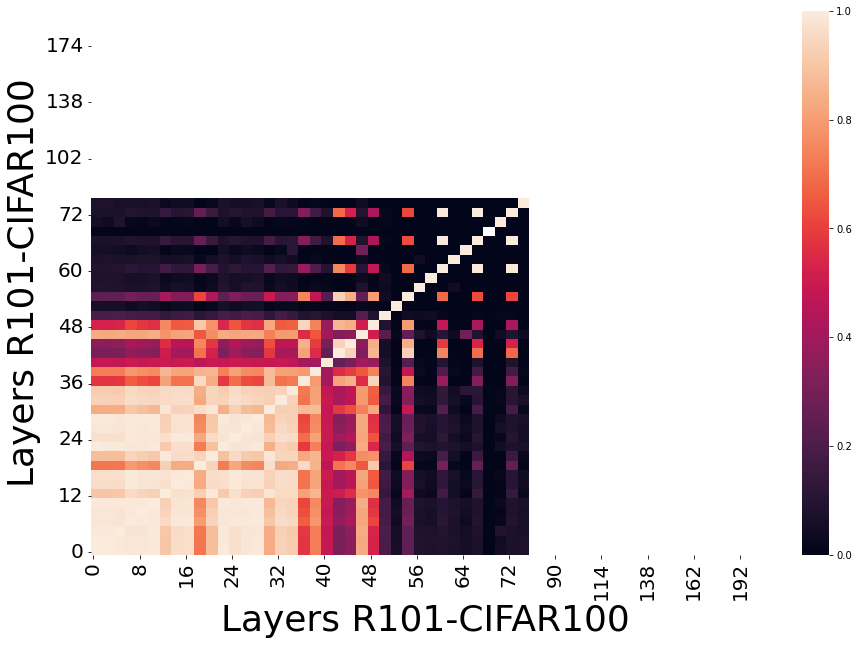

In [18]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(hsicDataFrame.T)
plt.xlabel("Layers "+LABEL,fontsize='36')
plt.ylabel("Layers "+LABEL,fontsize='36')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.invert_yaxis()
plt.savefig(LABEL+'.pdf',fmt='pdf',bbox_inches='tight')

In [23]:
hookLayersActivationDict.keys()

dict_keys(['bn1', 'relu', 'layer1.0.bn1', 'layer1.0.relu1', 'layer1.0.bn2', 'layer1.0.relu2', 'layer1.0.bn3', 'layer1.0.relu3', 'layer1.1.bn1', 'layer1.1.relu1', 'layer1.1.bn2', 'layer1.1.relu2', 'layer1.1.bn3', 'layer1.1.relu3', 'layer1.2.bn1', 'layer1.2.relu1', 'layer1.2.bn2', 'layer1.2.relu2', 'layer1.2.bn3', 'layer1.2.relu3', 'layer2.0.bn1', 'layer2.0.relu1', 'layer2.0.bn2', 'layer2.0.relu2', 'layer2.0.bn3', 'layer2.0.relu3', 'layer2.1.bn1', 'layer2.1.relu1', 'layer2.1.bn2', 'layer2.1.relu2', 'layer2.1.bn3', 'layer2.1.relu3', 'layer2.2.bn1', 'layer2.2.relu1', 'layer2.2.bn2', 'layer2.2.relu2', 'layer2.2.bn3', 'layer2.2.relu3', 'layer2.3.bn1', 'layer2.3.relu1', 'layer2.3.bn2', 'layer2.3.relu2', 'layer2.3.bn3', 'layer2.3.relu3', 'layer3.0.bn1', 'layer3.0.relu1', 'layer3.0.bn2', 'layer3.0.relu2', 'layer3.0.bn3', 'layer3.0.relu3', 'layer3.1.bn1', 'layer3.1.relu1', 'layer3.1.bn2', 'layer3.1.relu2', 'layer3.1.bn3', 'layer3.1.relu3', 'layer3.2.bn1', 'layer3.2.relu1', 'layer3.2.bn2', 'layer

In [25]:
hookLayersActivationDict['bn1'][0].reshape(hookLayersActivationDict['layer4.2.relu2'][0].size(0),-1)

tensor([[  2470.8672,  11990.0332,  55718.9844,  ...,  40486.5078,
          63346.6602, 108567.3125],
        [ 36187.5625,   7818.9937,      0.0000,  ...,  45126.8633,
          55840.9922,  40571.7031],
        [     0.0000,      0.0000,      0.0000,  ...,      0.0000,
              0.0000,      0.0000],
        ...,
        [ 56902.0977,  95666.7656, 108400.3672,  ..., 129388.2031,
         113691.7734,  52487.3320],
        [ 47958.2617,  64466.8242,  79109.1094,  ...,  70401.6719,
          77272.3359,  64168.8438],
        [     0.0000,  55899.3008, 135136.8750,  ..., 106018.9766,
         124997.9609,  93112.1016]], device='cuda:0')

In [34]:
hookLayersActivationDict['bn1'].size()

torch.Size([256, 64, 32, 32])

In [36]:
hookLayersActivationDict['bn1'][0].size(0)

64

In [37]:
oaL1 = hookLayersActivationDict['bn1'][0].reshape(hookLayersActivationDict['bn1'][0].size(0),-1)

In [39]:
oaL1.shape

torch.Size([64, 1024])

In [40]:
oaL2 = torch.flatten(hookLayersActivationDict['bn1'][0])

In [41]:
oaL2

tensor([0.6848, 0.9580, 0.9479,  ..., 0.1170, 0.1673, 0.2360], device='cuda:0')